# EDA
### Things to do for feature engineering:
- Merge the data 
- Dtype. Change all to int or float (not needed)
- Remove useless columns (eg. id)
- Add a price difference column (checkout_price - base_price)
- Normalization for specific columns (eg. exclude 'week')
- One-hot encode for categorical features
- If data is non stationary, use moving average to get the diff_y (not needed as target is stationary)



Data visualization (understand the data):
- Weekly demand data: (TBC)
    - How does promotion affect orders
    - How meal featured at homepage affect orders?
    - Are they making any profit (checkout - base)
- Fulfilment center data: (TBC)
    - Which Fulfilment center perform the best over time
    - How does the operation area, city, region and center type affect the number of orders? 
- meal info data: (TBC)
    - Which cruise perform the best
    - Which type of food perform the best (most orders)
- general checks for model training: (Priority)
    - Check if data has a seasonal trend for target*
    - Check for stationery of time (variance or mean should remain constant over time)
    - Correlation plot

- Reference:
    - https://www.kaggle.com/code/kanncaa1/time-series-prediction-tutorial-with-eda/notebook
    - https://towardsdatascience.com/why-does-stationarity-matter-in-time-series-analysis-e2fb7be74454#:~:text=Statistical%20tests%20allow%20us%20to,we%20reject%20the%20null%20hypothesis.

In [1]:
import pandas as pd
import os
import numpy as np 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('./data/train_GzS76OK/train.csv')
df2 = pd.read_csv('./data/train_GzS76OK/fulfilment_center_info.csv')
df3 = pd.read_csv('./data/train_GzS76OK/meal_info.csv')

df1.shape

(456548, 10)

In [4]:
df2.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [5]:
df3.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [3]:
# Given Test data (no true label. Don't use). Train/test split for the given train data.
pd.read_csv('./data/test_QoiMO9B.csv')

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


In [3]:
# Merage all 
df = pd.merge(df1, df2, on='center_id',how='left')
df = pd.merge(df,df3,on='meal_id',how='left')
print (df.shape)
df

(456548, 16)


,id,Date,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,28/1/2019,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,4/2/2019,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,4/2/2019,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,4/2/2019,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,4/2/2019,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,8/11/2021,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,1062036,8/11/2021,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,1110849,8/11/2021,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,1147725,8/11/2021,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [4]:
# check for duplicate data
df[df.duplicated()]

,id,Date,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine


In [8]:
df.isnull().sum()

id                       0
Date                     0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [5]:
# convert weeks to time stamp
# Calculate the date corresponding to the start of the first week
start_date = pd.to_datetime('2019-01-28')

# Calculate the date for each week based on the start date and the week number
df['date'] = start_date + pd.to_timedelta(df['week'] - 1, unit='W')

# Set the 'date' column as the index of the DataFrame
df.set_index('date', inplace=True)
df.head()

,id,Date,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
date,,,,,,,,,,,,,,,,
2019-01-28,1379560,28/1/2019,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
2019-01-28,1466964,4/2/2019,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2019-01-28,1346989,4/2/2019,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
2019-01-28,1338232,4/2/2019,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
2019-01-28,1448490,4/2/2019,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [6]:
# Drop unless columns
df.drop(['Date', 'id', 'week'], axis = 1, inplace =True)

In [7]:
#getting categorical variables
string_col=df.select_dtypes("object").columns.to_list()
print("categorical columns: " , len(string_col))

#getting numerical variables
int_col=df.select_dtypes(["int64","float64"]).columns.to_list()
print("numerical columns: " , len(int_col))

df_num = df[int_col]
df_num.head()

categorical columns:  3
numerical columns:  10


,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
date,,,,,,,,,,
2019-01-28,55,1885,136.83,152.29,0,0,177,647,56,2.0
2019-01-28,55,1993,136.83,135.83,0,0,270,647,56,2.0
2019-01-28,55,2539,134.86,135.86,0,0,189,647,56,2.0
2019-01-28,55,2139,339.50,437.53,0,0,54,647,56,2.0
2019-01-28,55,2631,243.50,242.50,0,0,40,647,56,2.0


In [8]:
# get only catagorical data for one hot
df_cat = df[string_col]
df_cat.head()

,center_type,category,cuisine
date,,,
2019-01-28,TYPE_C,Beverages,Thai
2019-01-28,TYPE_C,Beverages,Thai
2019-01-28,TYPE_C,Beverages,Thai
2019-01-28,TYPE_C,Beverages,Indian
2019-01-28,TYPE_C,Beverages,Indian


In [24]:
# Check if one-hot encoding is possible for all catagorical data. (Try not to expand the dimension too much)

cat_list = ['emailer_for_promotion',
            'homepage_featured',
            'category',
            'cuisine',
            'city_code',
            'region_code',
            'center_type',
            'op_area']

for i in cat_list:
    print (f'number of unique {i}: ', df[i].nunique())

number of unique emailer_for_promotion:  2
number of unique homepage_featured:  2
number of unique category:  14
number of unique cuisine:  4
number of unique city_code:  51
number of unique region_code:  8
number of unique center_type:  3
number of unique op_area:  30


In [9]:
# %matplotlib inline
# int_col1 = list(df_num)

# plt.figure(figsize=(15,10))
# for i,col in enumerate(int_col1,1):
#     plt.subplot(3, 4,i)
#     plt.title(f"Distribution of {col} Data")
#     sns.histplot(df_num[col],kde=False)
#     plt.tight_layout()
#     plt.plot()

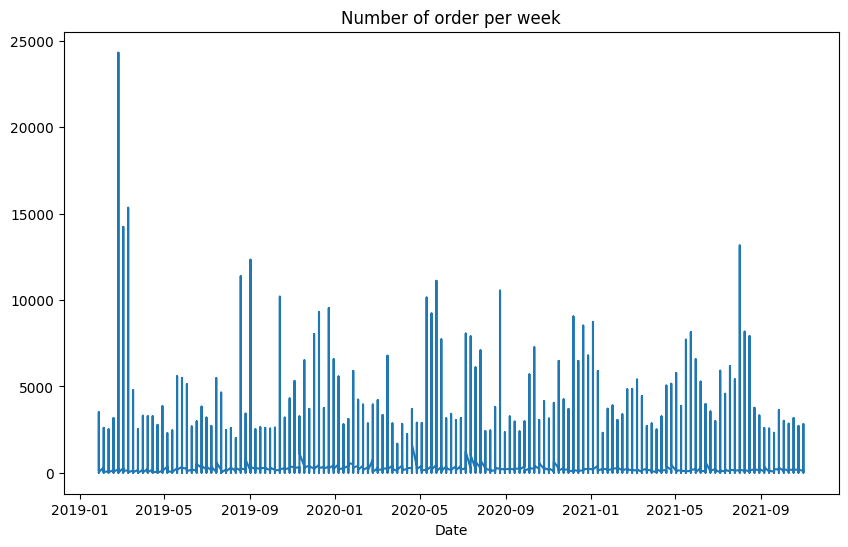

In [10]:
# set the figure size
plt.figure(figsize=(10, 6))

# plot the time series chart
plt.plot(df.index, df['num_orders'])

# set x-axis label and title
plt.xlabel('Date')
plt.title('Number of order per week')

# display the chart
plt.show()

Things to check eda (TBC):
- How emailer_for_promotion and homepage_featured affect number of orders (TBC)


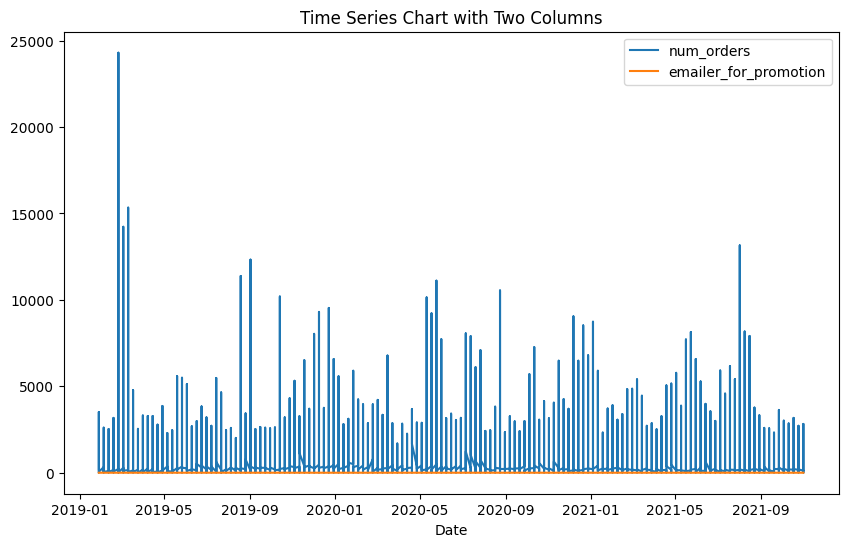

In [27]:
# set the figure size
plt.figure(figsize=(10, 6))

# plot the time series chart for column 1
plt.plot(df.index, df['num_orders'], label='num_orders')

# plot the time series chart for column 2
plt.plot(df.index, df['emailer_for_promotion'], label='emailer_for_promotion')

# set x-axis label and title
plt.xlabel('Date')
plt.title('Time Series Chart with Two Columns')

# add a legend
plt.legend()

# display the chart
plt.show()

In [36]:
df['emailer_for_promotion'].value_counts()

0    419498
1     37050
Name: emailer_for_promotion, dtype: int64

- general checks for model training: (Priority)
    - Check if data has a seasonal trend for target*
    - Check for stationery of time (variance or mean should remain constant over time)
    - Correlation plot

In [17]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller

# check for stationarity
X = df['num_orders'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -53.262305
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


If the ADF test statistic is less than the critical value, we can say that time series is stationary. In this case , our num_orders have ADF of -53 which is alot lesser than the critical values, hence its num_orders is a stationary data. (Don't need to make time series data stationary). If the p-value is less than the significance level (e.g., 0.05), then we reject the null hypothesis and conclude that there is evidence that the time series is stationary. 

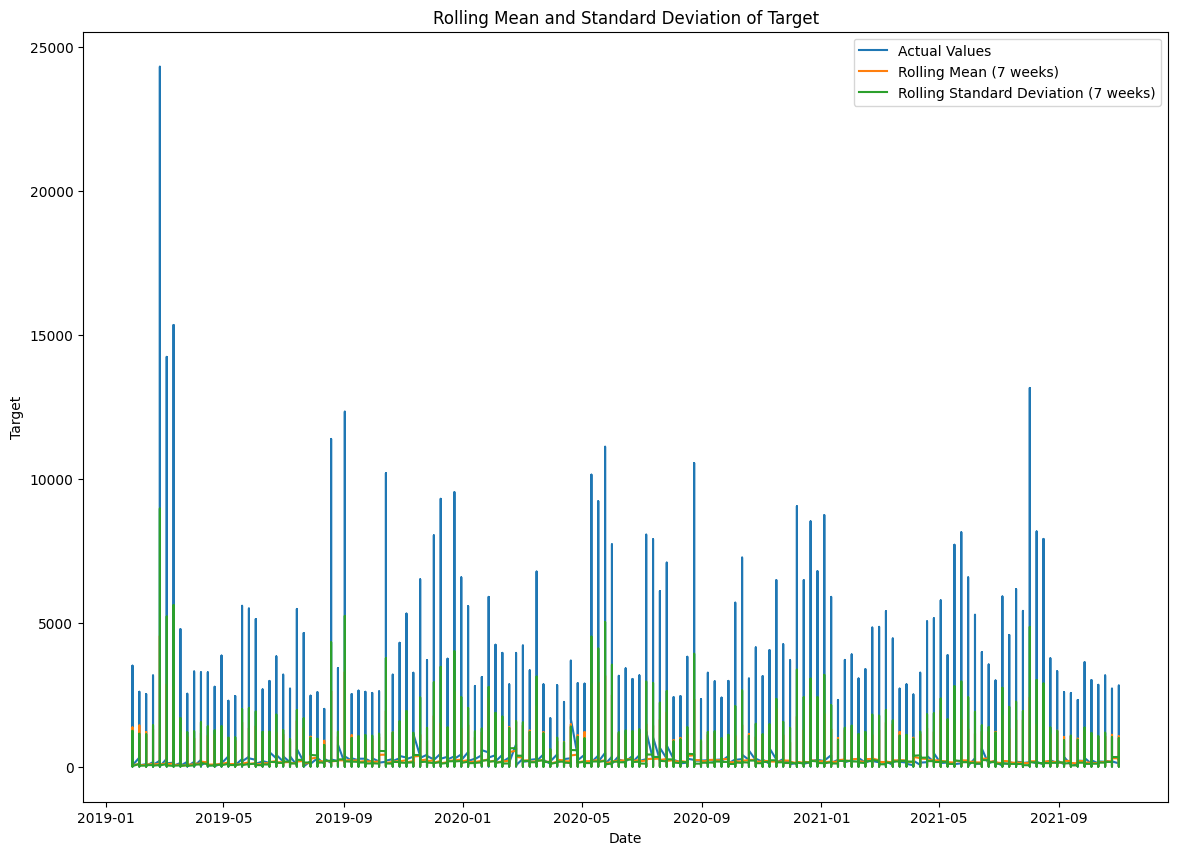

In [22]:
# set figure size
plt.figure(figsize=(14, 10))

# plot actual values
plt.plot(df.index, df['num_orders'], label='Actual Values')

# calculate rolling mean and plot it
rolling_mean = df['num_orders'].rolling(window=7).mean()
plt.plot(df.index, rolling_mean, label='Rolling Mean (7 weeks)')

# calculate rolling standard deviation and plot it
rolling_std = df['num_orders'].rolling(window=7).std()
plt.plot(df.index, rolling_std, label='Rolling Standard Deviation (7 weeks)')

# set x-axis label, y-axis label and title
plt.xlabel('Date')
plt.ylabel('Target')
plt.title('Rolling Mean and Standard Deviation of Target')

# add legend
plt.legend()

# display the chart
plt.show()

C:\Users\myeng\AppData\Local\Temp\ipykernel_89420\826912815.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c1 = df.corr()


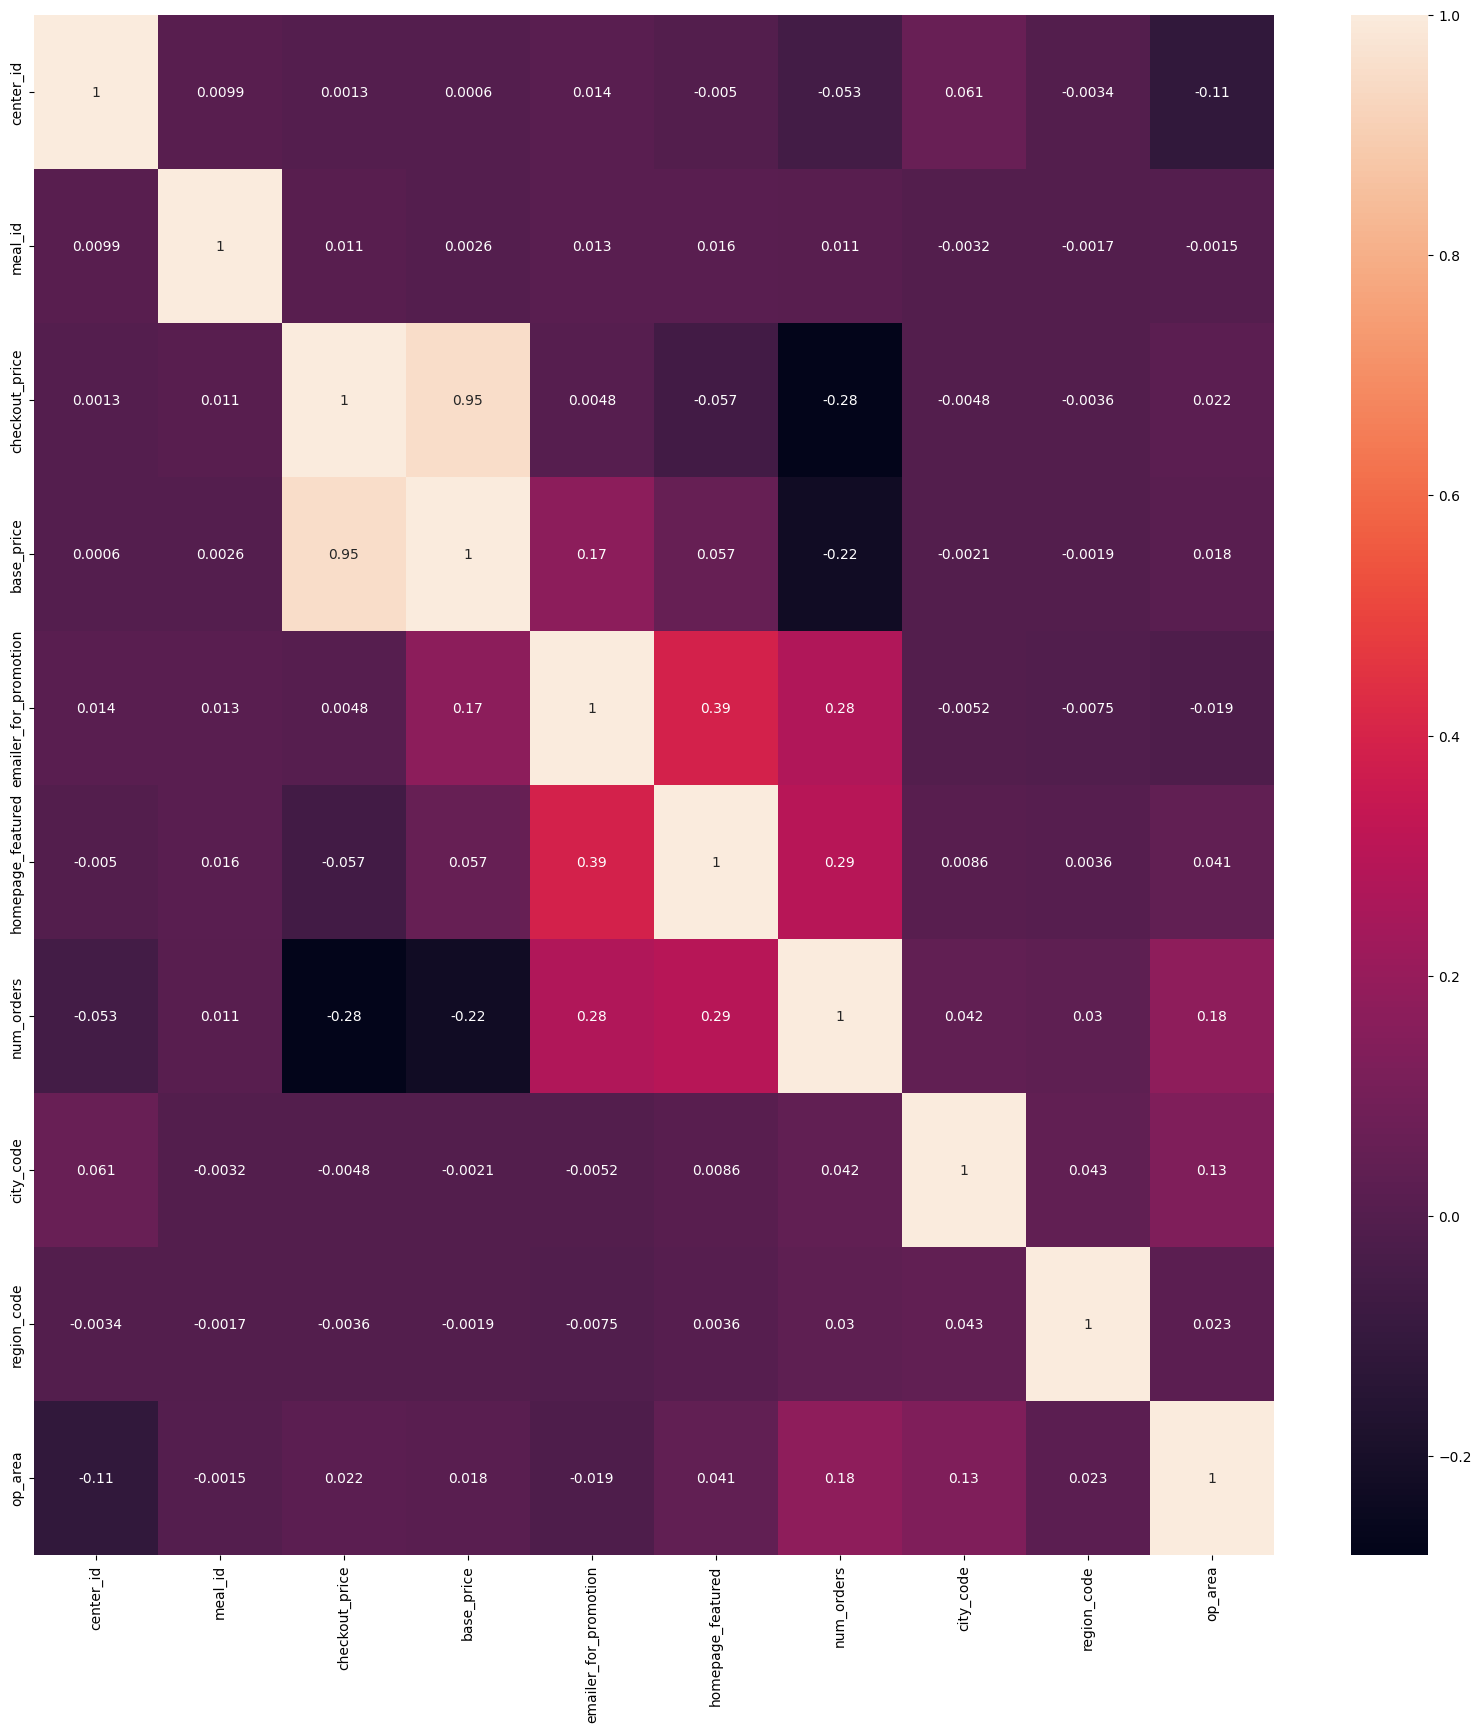

In [23]:
# Correlation plots
c1 = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(c1, annot=True)
plt.show()

Notes on correlation plots:
- 'Checkout_price' and 'base_price' has high positive correlation (0.95). Make sense as checkout_price is just base_price with discount, shipping fee, tax.
- Both 'homepage_featured' and 'emailer_for_promotion' are positively correlated to num_orders. This make sense as when there is promotions or items featured, the orders will increase.
- 'homepage_featured' are positively correlated to 'emailer_for_promotion'. It seems like whenever there is a promotion, the item will likely to be featured on main page.
- Both 'Checkout_price' and 'base_price' are negatively correlated to 'num_orders' as price increase, the number of orders should decrease. 

Cleaning need:
- High correlated features like 'Checkout_price' and 'base_price'. Drop 'base_price' and replace with 'adjusted_price' (difference between checkout and base price)

Why need remove correlated features?
- Multicollinearity (two or more predictor/independent variables in a regression model are highly correlated with each other) can cause several problems in regression analysis, such as unstable estimates of the regression coefficients, low precision of the coefficient estimates, and difficulty in interpreting the effects of individual predictor variables.

In [14]:
from dataprep.eda import create_report
from dataprep.eda import plot, plot_correlation, plot_missing
create_report(df).show_browser()

  0%|          | 0/2861 [00:00<?, ?it/s]

c:\Users\myeng\anaconda3\envs\assignment6\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\myeng\anaconda3\envs\assignment6\lib\site-packages\scipy\stats\_stats_py.py:5218: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
c:\Users\myeng\anaconda3\envs\assignment6\lib\site-packages\scipy\stats\_stats_py.py:5218: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
c:\Users\myeng\anaconda3\envs\assignment6\lib\site-packages\scipy\stats\_stats_py.py:5218: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
c:\Users\myeng\anaconda3\envs\assignment6\lib\site-packages\dataprep\eda\distribution\render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

# Feature engineering steps:

- Aim, create a py script. Input is file path and will return a clean df. Train/test split to be done seperately.
1. Merge df

2. Add a price_diff column

3. Drop unncessary columns
    - ['id','Date','week','base_price']

4. Split data into cat and num data
    - Cat data for one-hot encoding -> convert back into a df
    - num data for standard scaler

5. 

In [ ]:
#1. Merge df

df1 = pd.read_csv('./data/train_GzS76OK/train.csv')
df2 = pd.read_csv('./data/train_GzS76OK/fulfilment_center_info.csv')
df3 = pd.read_csv('./data/train_GzS76OK/meal_info.csv')

# Merage all 
df = pd.merge(df1, df2, on='center_id',how='left')
df = pd.merge(df,df3,on='meal_id',how='left')
print (df.shape)
df

In [ ]:
# Feature selection:
# Drop unless columns
df.drop(['Date', 'id', 'week'], axis = 1, inplace =True)

In [ ]:
cat_list = ['emailer_for_promotion',
            'homepage_featured',
            'category',
            'cuisine',
            'city_code',
            'region_code',
            'center_type',
            'op_area']

num_list = 

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(['num_orders'],axis=1)
y = df['num_orders']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    shuffle=False)
X

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,Beverages,Indian,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,Desert,Indian,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,Desert,Indian,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,Salad,Italian,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,Salad,Italian,473,77,TYPE_A,4.5


In [ ]:
#getting categorical variables
string_col=df.select_dtypes("object").columns.to_list()
print("categorical columns: " , len(string_col))

#getting numerical variables
int_col=df.select_dtypes(["int64","float64"]).columns.to_list()
print("numerical columns: " , len(int_col))

In [ ]:
# Define the columns to be used in each step of the pipeline
price_columns = ['checkout_price', 'base_price']
one_hot_encode_columns = ['week', 'center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured']
columns_to_drop = ['id']
passthrough_columns = ['num_orders']

# Define a pipeline that adds a new column, drops columns, and normalizes the data
preprocessing_pipeline = ColumnTransformer(transformers=[
    ('add_price_adjustment', FunctionTransformer(lambda x: x.assign(price_adjustment=x['checkout_price'] - x['base_price']), validate=False), price_columns),
    ('drop_columns', 'drop', columns_to_drop),
    ('one_hot_encode', OneHotEncoder(sparse=False, handle_unknown='ignore', 
                                      categories='auto', 
                                      drop='first', 
                                      dtype='float64'), string_col),
    ('normalize', StandardScaler(with_mean=True, with_std=True, copy=True), price_columns),
    ('passthrough', 'passthrough', passthrough_columns)
])


In [ ]:
# Preprocessing:


In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tstransformer import TimeSeriesTransformer
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib

# Load the dataset into a pandas dataframe
df = pd.read_csv('data.csv')

# Define the columns to be used in each step of the pipeline
price_columns = ['checkout_price', 'base_price']
one_hot_encode_columns = ['week', 'center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured']
passthrough_columns = ['num_orders']

# Define a pipeline that adds a new column, drops columns, and normalizes the data
preprocessing_pipeline = ColumnTransformer(transformers=[
    ('add_price_adjustment', FunctionTransformer(lambda x: x.assign(price_adjustment=x['checkout_price'] - x['base_price']), validate=False), price_columns),
    ('drop_columns', 'drop', ['column1', 'column2']),
    ('one_hot_encode', OneHotEncoder(sparse=False, handle_unknown='ignore', 
                                      categories='auto', 
                                      drop='first', 
                                      dtype='float64'), one_hot_encode_columns),
    ('normalize', StandardScaler(with_mean=True, with_std=True, copy=True), price_columns),
    ('passthrough', 'passthrough', passthrough_columns)
])

######################################################################################################
# 1. Define a pipeline with Random Forest estimator
rf_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('random_forest', RandomForestRegressor())
])

# Train and evaluate the Random Forest pipeline
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

# Save the trained Random Forest model
joblib.dump(rf_pipeline, 'rf_model.joblib')

# Load the saved Random Forest model
loaded_rf_pipeline = joblib.load('rf_model.joblib')

# Make predictions using the loaded Random Forest model
loaded_rf_pred = loaded_rf_pipeline.predict(X_test)

# Define a pipeline with ARIMA estimator
arima_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('arima', ARIMA())
])

######################################################################################################
# 2. Train and evaluate the ARIMA pipeline
arima_pipeline.fit(X_train, y_train)
arima_pred = arima_pipeline.predict(X_test)
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_pred))

# Save the trained ARIMA model
joblib.dump(arima_pipeline, 'arima_model.joblib')

# Load the saved ARIMA model
loaded_arima_pipeline = joblib.load('arima_model.joblib')

# Make predictions using the loaded ARIMA model
loaded_arima_pred = loaded_arima_pipeline.predict(X_test)

######################################################################################################
# 3. Define a pipeline with LSTM estimator
lstm_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('lstm', Sequential([LSTM(units=32, return_sequences=True), LSTM(units=16), LSTM(units=8), Dense(units=1)]))
])

# Train and evaluate the LSTM pipeline
lstm_pipeline.fit(X_train, y_train)
lstm_pipeline.save('lstm_model.h5')
lstm_pred = lstm_pipeline.predict(X_test)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))

# Load the saved LSTM model
loaded_lstm_pipeline = load_model('lstm_model.h5')

# Make predictions using the loaded LSTM model
loaded_lstm_pred = loaded_lstm_pipeline.predict(X_test)

######################################################################################################
# 4. Define a pipeline with Time Series Transformer estimator
transformer_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('transformer', TimeSeriesTransformer(input_shape=(X_train.shape[1], X_train.shape[2])))
])

# Train and evaluate the Time Series Transformer pipeline
transformer_pipeline.fit(X_train, y_train)
transformer_pipeline.save('transformer_model.h5')
transformer_pred = transformer_pipeline.predict(X_test)
transformer_rmse = np.sqrt(mean_squared_error(y_test, transformer_pred))

# Load the saved Time Series Transformer model
loaded_transformer_pipeline = load_model('transformer_model.h5')

# Make predictions using the loaded Time Series Transformer model
loaded_transformer_pred = loaded_transformer_pipeline.predict(X_test)

######################################################################################################
# Compare the RMSE scores for all the estimators
score_df = pd.DataFrame({
    'Estimator': ['Random Forest', 'ARIMA', 'LSTM', 'Time Series Transformer'],
    'RMSE': [rf_rmse, arima_rmse, lstm_rmse, transformer_rmse]
})

print(score_df)
